In [22]:
import osmnx as ox
import folium
import geopandas as gpd

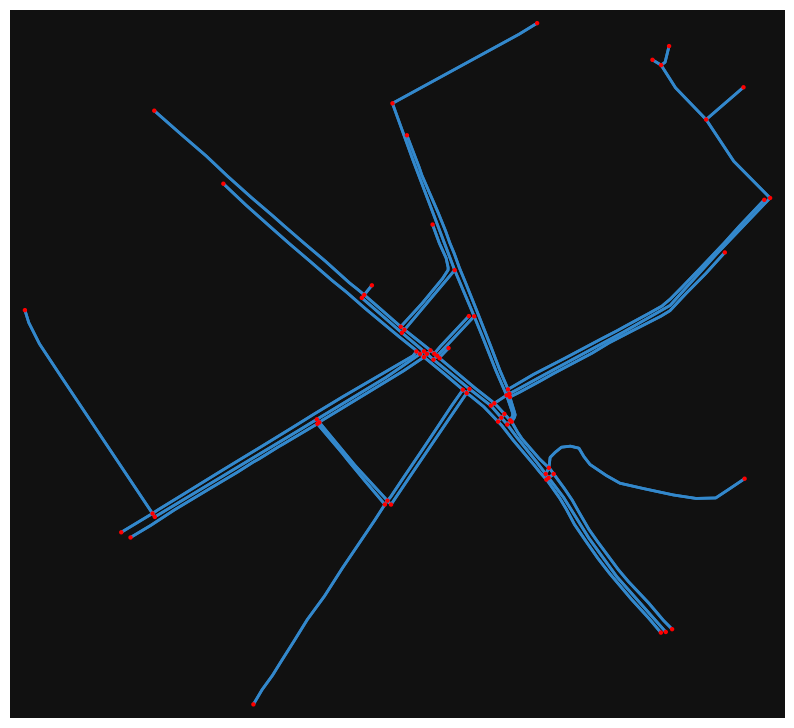

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

In [12]:
# Get walkable network of Copenhagen
G = ox.graph_from_place("Copenhagen, Denmark", network_type="walk")

ox.plot_graph(G, figsize=(10, 10), node_color='r', node_size=10, edge_color='#3388cc', edge_linewidth=2)


In [ ]:
# Get the center of the map to center the folium map
place_name = "Copenhagen, Denmark"
location = ox.geocode(place_name)

# Create a base map with folium
m = folium.Map(location=location, zoom_start=14)

# Extract the nodes and edges from the graph
nodes, edges = ox.graph_to_gdfs(G)

# Plot the edges (streets) of the graph manually on the folium map
for _, row in edges.iterrows():
    # Each edge is a line segment
    folium.PolyLine(locations=[(lat, lon) for lat, lon in zip(row['geometry'].xy[1], row['geometry'].xy[0])],
                    color='#3388cc', weight=2, opacity=0.7).add_to(m)

# Show the map
m


In [27]:
metro_locations = {
    "Nørreport": ox.geocode("Nørreport Station, Copenhagen, Denmark"),
    "Kongens Nytorv": ox.geocode("Kongens Nytorv Station, Copenhagen, Denmark")
}




In [28]:
# Define the tags for searching stations
tags = {"railway": True, "public_transport": True}

# Use the location to search for station features within a specific radius (e.g., 1000 meters)
stations_gdf = ox.features.features_from_point(location, tags, dist=1000)

# Check the first few rows to inspect the data
print(stations_gdf.head())

                                    geometry level            name network  \
element id                                                                   
node    21701642   POINT (12.58514 55.67922)    -2  Kongens Nytorv   Metro   
        21701643   POINT (12.57271 55.68387)   NaN       Nørreport     NaN   
        25389793   POINT (12.57096 55.68386)   NaN       Nørreport     NaN   
        26007425   POINT (12.57169 55.68347)   NaN       Nørreport     NaN   
        298535593  POINT (12.55457 55.68456)   NaN    Blagardsgade     NaN   

                  public_transport railway subway wheelchair local_ref train  \
element id                                                                     
node    21701642     stop_position    stop    yes        yes       NaN   NaN   
        21701643     stop_position    stop    NaN        NaN         2   yes   
        25389793     stop_position    stop    yes        NaN       NaN   NaN   
        26007425     stop_position    stop    NaN    